In [1]:
from itertools import combinations, groupby
import networkx as nx
import random
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd

In [2]:
fields = []
rows = []

In [3]:
raw_adj_matrix = pd.read_csv('adj_matrix.csv', index_col=0) #genfromtxt('adj_matrix.csv', delimiter=',')

In [4]:
print("rows=",len(raw_adj_matrix))
print(raw_adj_matrix)

rows= 10
   A  B  C  D  E  F  G  H  I  J
A  0  0  0  0  0  0  4  0  0  0
B  0  0  1  0  0  0  0  0  0  2
C  0  1  0  0  0  0  0  3  0  0
D  0  0  0  0  0  0  0  0  1  0
E  0  0  0  0  0  0  0  1  6  0
F  0  0  0  0  0  0  1  0  5  0
G  4  0  0  0  0  1  0  0  0  3
H  0  0  3  0  1  0  0  0  0  4
I  0  0  0  1  6  5  0  0  0  4
J  0  2  0  0  0  0  3  4  4  0


In [5]:
def save_layout(layout):
    layout_items = layout.values()
    layout_list = list(layout_items)
    print(layout_items)
    nplayout = np.array(layout_list)
    #np.save('layout.npy',nplayout)
    np.savetxt('layout.txt', nplayout)
    
def load_layout(name): #'layout.npy'
    nplayout = np.loadtxt(name, dtype=float)
    layout = { x: y for x,y in zip(range(len(nplayout)), nplayout)}
    return layout

def make_graph(_adjacency_matrix, _directed = True):
    rows, cols = np.where(_adjacency_matrix > 0)
    edges = zip(rows.tolist(), cols.tolist())
    weighted_edges = zip(rows.tolist(), cols.tolist())
    weighted_edges = weighted_edges
    #weighted_edges2 = [ (x, y, {'weight': 3}) for (x, y) in weighted_edges ]
    edge_labels2 = { (x, y): _adjacency_matrix[x,y] for (x, y) in edges}
    gr = nx.DiGraph(directed=_directed)
    all_rows = range(0, _adjacency_matrix.shape[0])
    for n in all_rows:
        gr.add_node(n)
    gr.add_edges_from(weighted_edges)
    return gr,  edge_labels2

In [6]:

def show_graph_with_labels(_gr, _node_labels, _edge_labels):
    options = {
    'node_color': 'yellow',     # color of node
    'width': 1,                 # line width of edges
    'edge_color':'blue',        # edge color
    }
    plt.figure(figsize=(12,7))
    #labels = nx.get_edge_attributes(gr,'weight')
    layout = load_layout('layout.txt') #nx.spring_layout(gr, scale=2)
    nx.draw_networkx(_gr, layout, labels=_node_labels, node_size=500, with_labels=True, arrows=False, font_weight='normal',**options)
    nx.draw_networkx_edge_labels(_gr, pos=layout, edge_labels=_edge_labels)
    plt.show()
    


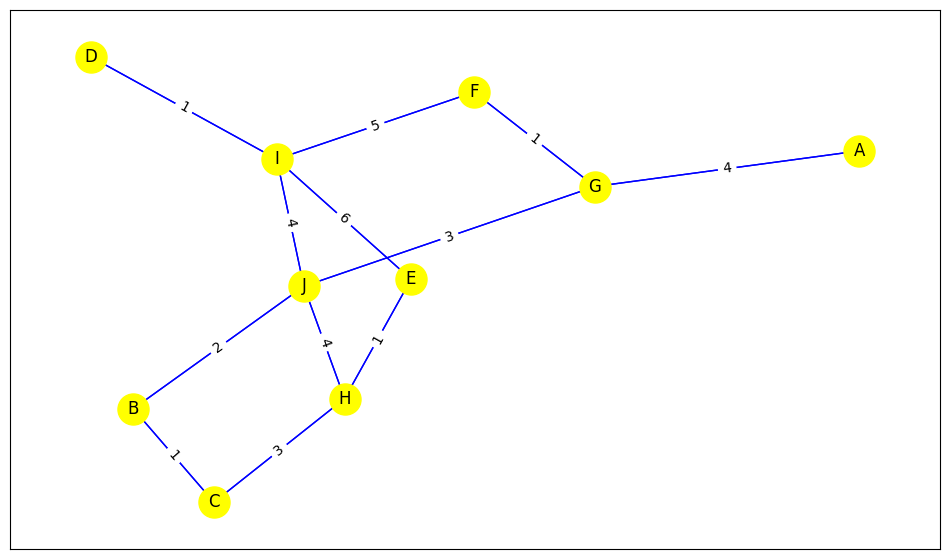

In [7]:
node_labels = { x: y for  x, y in zip(range(len(raw_adj_matrix.columns)), raw_adj_matrix.columns)}
G1, edlabels = make_graph(raw_adj_matrix.values, False)
show_graph_with_labels(G1,  node_labels, edlabels)

In [8]:

def show_directed_graph_with_labels(_gr, _node_labels, _edge_labels):
    options = {
    'node_color': 'yellow',     # color of node
    'width': 1,                 # line width of edges
    'arrowstyle': '-|>',        # array style for directed graph
    'arrowsize': 14,            # size of arrow
    'edge_color':'blue',        # edge color
    }
    plt.figure(figsize=(12,7))
    layout = load_layout('layout.txt') #nx.spring_layout(gr, scale=2)
    nx.draw_networkx(_gr, layout, labels=_node_labels, node_size=500, with_labels=True,  font_weight='normal', arrows=True,**options)
    nx.draw_networkx_edge_labels(_gr, pos=layout, edge_labels=_edge_labels)
    plt.show()
    

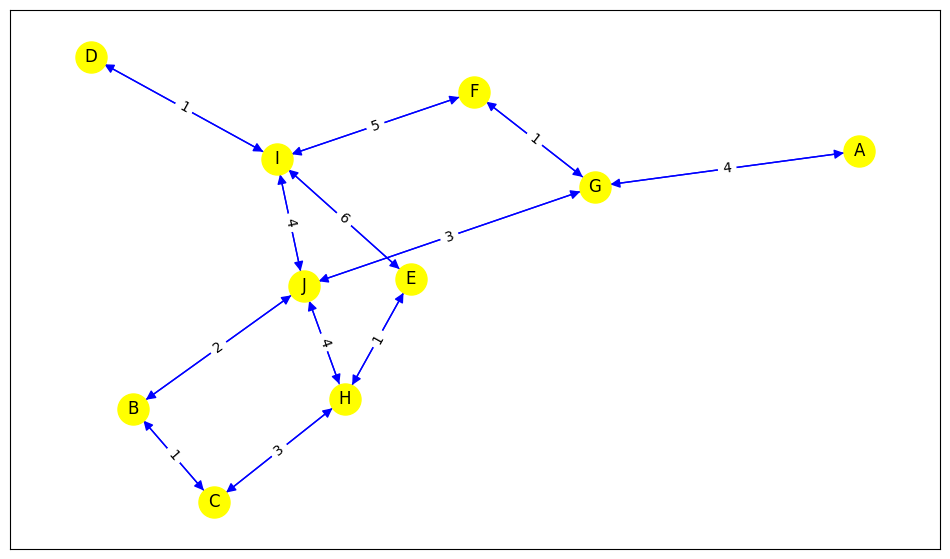

In [9]:
G2, edlabels = make_graph(raw_adj_matrix.values, True)
show_directed_graph_with_labels(G2,  node_labels, edlabels)